# import needed packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# read in data and seperate to train and test

In [2]:
df_train = pd.read_csv('RF_train.csv',index_col=0)
df_test = pd.read_csv('RF_test.csv',index_col=0)

X_train = df_train.drop('digit',axis=1)
y_train = df_train['digit']
X_test = df_test.drop('digit',axis=1)
y_test = df_test['digit']

# build random forest classifier model

## instance classifier

In [3]:
standardizer=StandardScaler()
rf=RandomForestClassifier(n_estimators=50)

## pipeline

In [4]:
pl = Pipeline([('standardizer',standardizer),('clf',rf)])

## train model

In [5]:
pl.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('standardizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

## confusion matrix on training set

In [6]:
pd.DataFrame(confusion_matrix(y_train, pl.predict(X_train),labels=[0,1,2,3,4,5,6,7,8,9]),
            index=range(0,10),
            columns=range(0,10))

,0,1,2,3,4,5,6,7,8,9
0,780,0,0,0,0,0,0,0,0,0
1,0,779,0,0,0,0,0,0,0,0
2,0,0,780,0,0,0,0,0,0,0
3,0,0,0,719,0,0,0,0,0,0
4,0,0,0,0,780,0,0,0,0,0
5,0,0,0,0,0,720,0,0,0,0
6,0,0,0,0,0,0,720,0,0,0
7,0,0,0,0,0,0,0,778,0,0
8,0,0,0,0,0,0,0,0,719,0
9,0,0,0,0,0,0,0,0,0,719


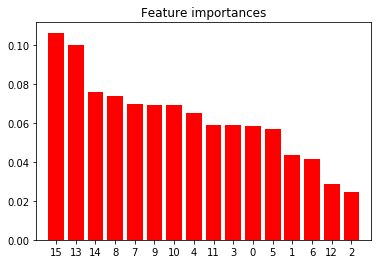

In [7]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.title("Feature importances")
#plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Model evaluation on test dataset

## model accuarcy on test dataset

In [8]:
pl.score(X_test,y_test)

0.9625500285877644

## confusion matrix for test dataset

In [9]:
pd.DataFrame(confusion_matrix(y_test,pl.predict(X_test),labels=[0,1,2,3,4,5,6,7,8,9]),
            index=range(0,10),
            columns=range(0,10))

,0,1,2,3,4,5,6,7,8,9
0,347,0,0,0,0,0,1,0,15,0
1,0,332,29,1,1,0,0,1,0,0
2,0,4,360,0,0,0,0,0,0,0
3,0,2,0,333,0,0,0,0,0,1
4,0,1,0,0,360,2,0,0,0,1
5,0,0,0,9,0,310,0,0,1,15
6,1,0,0,0,0,0,335,0,0,0
7,0,28,1,0,0,0,0,327,0,8
8,1,0,0,0,0,0,0,2,333,0
9,0,2,0,0,1,0,0,2,1,330
